In [1]:
#Importing the necessary libraries
from sklearn import datasets
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn import neighbors
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix 
import seaborn as sns


In [2]:
#Importing the dataset
dataset = datasets.load_breast_cancer()
X = dataset['data']
Y = dataset['target']


In [3]:
#Checking for shapes of X and Y
X.shape, Y.shape


((569, 30), (569,))

In [4]:
#Splitting the data into training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3,random_state = 0)


#Looking for the shapes
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)


(398, 30) (398,) (171, 30) (171,)


# # implementing sklearn knn classifier 

In [5]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
accuracy = clf.score(X_test, Y_test)
print('For inbuilt classifier, score is : ', accuracy)


For inbuilt classifier, score is :  0.9473684210526315


Text(91.68,0.5,'Predicted_label')

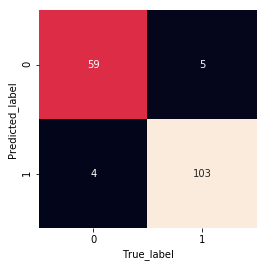

In [6]:
M = confusion_matrix(Y_test,Y_pred)
labels = np.unique(Y)
sns.heatmap(M.T, square = True, annot = True, fmt = 'd', cbar = False, xticklabels = labels, yticklabels = labels )
plt.xlabel('True_label')
plt.ylabel('Predicted_label')


# Implementing our own knn classifier 

step1 -> find the optimal value of k 
step2 -> find the k nearest points of testing data 
step3 -> find the most common class out of those k points

In [7]:
#finding the optimal k using cross validation
#fit function will return the optimal value of k

kvsscore = []
def fit(X_train, Y_train):
    score_max = 0
    for i in range(1,30,2):
        clf = neighbors.KNeighborsClassifier(n_neighbors = i)
        score = cross_val_score(clf,X_train, Y_train)
        avg_score = score.mean()
        kvsscore.append([i,avg_score])
        if(avg_score > score_max):
            k = i
            score_max = avg_score
            
    #displaying variation of score with k
    array = np.array(kvsscore)
    X = np.array(array[:,0], dtype = 'int32')
    Y = np.array(array[:,1])
    plt.plot(X, Y, color='blue')
    plt.show()
    return k


#prediction functions
def predict_single_point(X_train,Y_train,point,k):
    distances = []
    for i in range(len(Y_train)):
        distance = ((X_train[i,:] - point)**2).sum()
        distances.append((distance,Y_train[i]))
    distances = sorted(distances)
    target = []
    for i in range(k):
        target.append(distances[i][1])
    return Counter(target).most_common(1)[0][0]
def predict(X_train,Y_train,X_test,k):
    Y_pred = []
    for point in X_test:
        Y_pred.append(predict_single_point(X_train,Y_train,point,k))
    return Y_pred


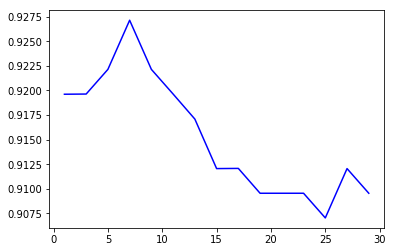

Score in case of self-implemented KNN classifier is :  0.9532163742690059


Text(91.68,0.5,'Predicted_label')

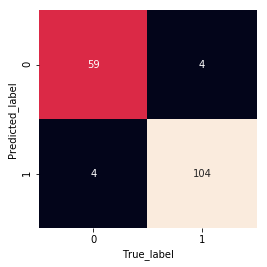

In [8]:
#predicting results
k = fit(X_train, Y_train)
Y_pred = predict(X_train, Y_train, X_test, k)
score = accuracy_score(Y_test,Y_pred)
print('Score in case of self-implemented KNN classifier is : ',score)

#confusion matrix
M = confusion_matrix(Y_test,Y_pred)
labels = np.unique(Y)
sns.heatmap(M.T, square = True, annot = True, fmt = 'd', cbar = False, xticklabels = labels, yticklabels = labels )
plt.xlabel('True_label')
plt.ylabel('Predicted_label')